In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import my_functions
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

En este punto del proyecto se explorará más en profundidad los dataset procesados en el ETL.

Se realiza la carga de los mismos.

In [2]:
# Cargar user_reviews
df_items = pd.read_csv('Datasets/Datasets ETL/user_items_v1.csv')

In [3]:
df_items.head()

,game_id,app_name,playtime_forever,user_id
0,10,Counter-Strike,6,76561197970982479
1,20,Team Fortress Classic,0,76561197970982479
2,30,Day of Defeat,7,76561197970982479
3,40,Deathmatch Classic,0,76561197970982479
4,50,Half-Life: Opposing Force,0,76561197970982479


In [4]:
# Modificar tipo de columna 'id' a string
df_items['game_id'] = df_items['game_id'].astype(str)

df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094082 entries, 0 to 5094081
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   game_id           object
 1   app_name          object
 2   playtime_forever  int64 
 3   user_id           object
dtypes: int64(1), object(3)
memory usage: 155.5+ MB


In [5]:
my_functions.describe_df(df_items)

Cantidad Registros:  5094082
Cantidad Campos:  4


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,game_id,object,0,0.0,5094082,100.0,10978,0.22
1,app_name,object,0,0.0,5094082,100.0,10947,0.21
2,playtime_forever,int64,0,0.0,5094082,100.0,48861,0.96
3,user_id,object,0,0.0,5094082,100.0,70912,1.39


### Observaciones iniciales

Este dataset tiene un total de 5094082 registros, sin valores únicos de identificación. 

El campo de mayor importancia en este caso sería el 'user_id'. Cada usuario cuenta con 1 o más juegos.

En total hay 70912 usuarios, 10978 juegos.

No existen valores nulos en todo el dataset, punto que fue trabajado en el ETL.

## Exploración

### 'user_id'

Comenzamos explorando la cantidad de juegos por usuario.

In [6]:
# juegos por usuario
juegos_por_usuario = df_items.groupby('user_id')['game_id'].count()

juegos_por_usuario = df_items.groupby('user_id')['game_id'].count().reset_index()
juegos_por_usuario.columns = ['user_id', 'games']

# Ordenar de mayor a menor según la cantidad de reviews
juegos_por_usuario = juegos_por_usuario.sort_values(by='games', ascending=False)

# Mostrar el resultado
juegos_por_usuario

,user_id,games
65868,phrostb,7762
69170,thugnificent,6700
57814,chidvd,6410
65886,piepai,6132
64104,mayshowganmore,5027
...,...,...
38243,76561198092978311,1
38248,76561198092984441,1
38249,76561198092985047,1
38263,76561198092995747,1


In [7]:
my_functions.stats(juegos_por_usuario, 'games')

Campo: games
Valor Máximo: 7762.0
Valor Mínimo: 1.0
Promedio: 71.83667080324909


El valor máximo es de 7762 juegos para un usuario, en promedio poco más de 71.

Se observa su distribución.

  rango_juegos  user_id  porcentaje
0       1-1000    70767   99.795521
1    1001-2000      106    0.149481
2    2001-3000       23    0.032435
3  Más de 3000       16    0.022563


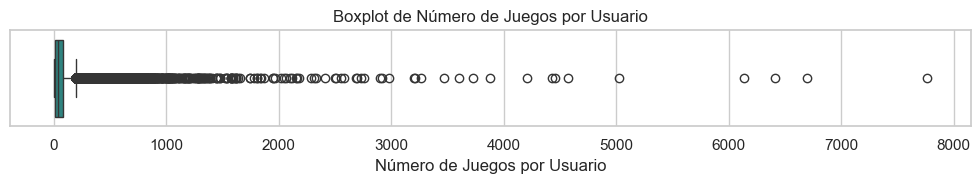

In [8]:
# Crea una nueva columna llamada 'rango_juegos' utilizando pd.cut
bins = [0, 1000, 2000, 3000, float('inf')]
labels = ['1-1000', '1001-2000', '2001-3000', 'Más de 3000']

juegos_por_usuario['rango_juegos'] = pd.cut(juegos_por_usuario['games'], bins=bins, labels=labels, right=False)

# Agrupa por el rango de juegos y cuenta la cantidad de usuarios en cada grupo
agrupado_por_rango = juegos_por_usuario.groupby('rango_juegos')['user_id'].count().reset_index()

# Calcula el porcentaje en relación con el total de usuarios
agrupado_por_rango['porcentaje'] = (agrupado_por_rango['user_id'] / len(juegos_por_usuario)) * 100

# Muestra el DataFrame resultante
print(agrupado_por_rango)


# Configuración de la estética
sns.set(style="whitegrid")
plt.figure(figsize=(10, 2))

# Crear el boxplot
box_plot = sns.boxplot(x='games', data=juegos_por_usuario, palette="viridis")

# Configurar etiquetas y título
box_plot.set(xlabel='Número de Juegos por Usuario', title='Boxplot de Número de Juegos por Usuario')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Casi el 100% de los usuarios tienen 1000 o menos juegos. 

Se explora la distribución hasta 200 juegos.

  rango_juegos  user_id  porcentaje
0         1-40    35342   49.839237
1        41-80    15763   22.228960
2       81-120     8128   11.462094
3      121-160     4448    6.272563
4      161-200     2463    3.473319


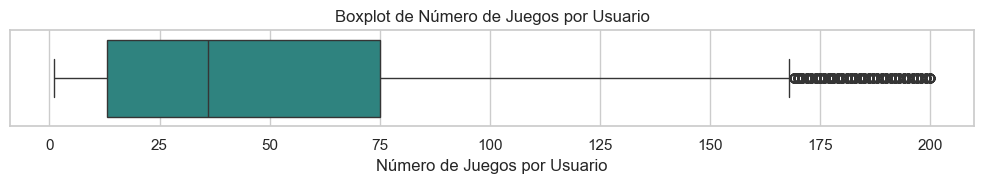

In [9]:
# juegos por usuario
juegos_por_usuario = df_items.groupby('user_id')['game_id'].count()

juegos_por_usuario = df_items.groupby('user_id')['game_id'].count().reset_index()
juegos_por_usuario.columns = ['user_id', 'games']

# Ordenar de mayor a menor según la cantidad de reviews
juegos_por_usuario = juegos_por_usuario.sort_values(by='games', ascending=False)

# Mostrar el resultado
juegos_por_usuario

# Filtrar juegos_por_usuario para aquellos con menos de 1000 juegos
juegos_filtrados = juegos_por_usuario[juegos_por_usuario['games'] <= 200]

# Crea una nueva columna llamada 'rango_juegos' utilizando pd.cut
bins = [0, 40, 80, 120, 160, float('inf')]
labels = ['1-40', '41-80', '81-120', '121-160', '161-200']


juegos_filtrados['rango_juegos'] = pd.cut(juegos_filtrados['games'], bins=bins, labels=labels, right=False)

# Agrupa por el rango de juegos y cuenta la cantidad de usuarios en cada grupo
agrupado_por_rango = juegos_filtrados.groupby('rango_juegos')['user_id'].count().reset_index()

# Calcula el porcentaje en relación con el total de usuarios
agrupado_por_rango['porcentaje'] = (agrupado_por_rango['user_id'] / len(juegos_por_usuario)) * 100

# Muestra el DataFrame resultante
print(agrupado_por_rango)

# Configuración de la estética
sns.set(style="whitegrid")
plt.figure(figsize=(10, 2))

# Crear el boxplot
box_plot = sns.boxplot(x='games', data=juegos_filtrados, palette="viridis")

# Configurar etiquetas y título
box_plot.set(xlabel='Número de Juegos por Usuario', title='Boxplot de Número de Juegos por Usuario')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El 93% de los usuarios tienen hasta 200 juegos.

### 'playtime_forever'

Procedemos a explorar el tiempo de juego de cada usuario.

El campo 'playtime_forever' expresa la cantidad de horas de juego.

In [10]:
# playtime por usuario
playtime_por_usuario = df_items.groupby('user_id')['game_id'].count()

playtime_por_usuario = df_items.groupby('user_id')['playtime_forever'].sum().reset_index()
playtime_por_usuario.columns = ['user_id', 'playtime_forever']

# Ordenar de mayor a menor según la cantidad de reviews
playtime_por_usuario = playtime_por_usuario.sort_values(by='playtime_forever', ascending=False)

print(my_functions.stats(playtime_por_usuario, 'playtime_forever'))


Campo: playtime_forever
Valor Máximo: 4660393.0
Valor Mínimo: 0.0
Promedio: 71154.72922777527
None


Se observan valores llamativos que, teniendo en cuenta que estamos tratando con valores de horas, parecen ser irreales.

In [11]:
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

# Mostrar el resultado
playtime_por_usuario.head(100)

,user_id,playtime_forever
52202,REBAS_AS_F-T,4660393
67522,shinomegami,3303502
53421,Sp3ctre,2822860
46809,DownSyndromeKid,2790419
54005,Terminally-Chill,1734007
68265,stopgovtcorruption,1717609
53567,Steamified,1693063
46048,Cow666,1674805
51885,PiozZ,1570365
69267,tobscene,1365671


In [12]:
pd.reset_option('display.max_rows')

Observando los primeros 100 registros, se ve que van de 600 mil a más de 4 millones de horas de juego por usuario, lo cual claramente es información errónea.

Se continúa la exploración para determinar como tratar estos valores.

Para ello se determinarán distintos rangos de horas y el porcentaje sobre el total de horas acumuladas.

In [13]:
def crear_rango(df_total, campo_calculado, max_valor, salto_bins):
    # Crea una nueva columna llamada 'rango_'+campo_calculado utilizando pd.cut
    bins = [i * salto_bins for i in range(int(max_valor/salto_bins) + 1)]
    labels = [f'{i}-{i+salto_bins}' for i in range(0, max_valor, salto_bins)]

    df_total['rango'] = pd.cut(df_total[campo_calculado], bins=bins, labels=labels, right=False)

    # Agrupa por el rango de campo_calculado y cuenta la cantidad de usuarios en cada grupo
    agrupado_por_rango = df_total.groupby('rango')[campo_calculado].count().reset_index()

    # Renombrar la columna a 'cantidad'
    agrupado_por_rango = agrupado_por_rango.rename(columns={campo_calculado: 'cantidad'})

    # Calcula el porcentaje en relación con el total de usuarios
    agrupado_por_rango['porcentaje'] = (agrupado_por_rango['cantidad'] / len(df_total)) * 100

    print(f"Rango {campo_calculado} hasta {max_valor}\n")
    return agrupado_por_rango


In [14]:
print(crear_rango(playtime_por_usuario, 'playtime_forever', 5000000, 1000000))

print("\n")

print(crear_rango(playtime_por_usuario, 'playtime_forever', 1000000, 100000))

Rango playtime_forever hasta 5000000

             rango  cantidad  porcentaje
0        0-1000000     70895   99.976027
1  1000000-2000000        13    0.018333
2  2000000-3000000         2    0.002820
3  3000000-4000000         1    0.001410
4  4000000-5000000         1    0.001410


Rango playtime_forever hasta 1000000

            rango  cantidad  porcentaje
0        0-100000     52945   74.662963
1   100000-200000     12776   18.016697
2   200000-300000      3592    5.065433
3   300000-400000      1020    1.438403
4   400000-500000       345    0.486519
5   500000-600000       126    0.177685
6   600000-700000        49    0.069100
7   700000-800000        24    0.033845
8   800000-900000        14    0.019743
9  900000-1000000         4    0.005641


In [15]:
print(crear_rango(playtime_por_usuario, 'playtime_forever', 1000000, 200000))

print("\n")

print(crear_rango(playtime_por_usuario, 'playtime_forever', 200000, 50000))

Rango playtime_forever hasta 1000000

            rango  cantidad  porcentaje
0        0-200000     65721   92.679659
1   200000-400000      4612    6.503836
2   400000-600000       471    0.664204
3   600000-800000        73    0.102944
4  800000-1000000        18    0.025384


Rango playtime_forever hasta 200000

           rango  cantidad  porcentaje
0        0-50000     37732   53.209612
1   50000-100000     15213   21.453351
2  100000-150000      8283   11.680675
3  150000-200000      4493    6.336022


Hasta acá se puede observar que hasta 200 mil horas de juego están contenidos casi el 93% de los usuarios.

Casi el 75% tiene menos de 100 mil horas de juego.

Casi un 25% menos de 10 mil horas de juego.

In [16]:
print(crear_rango(playtime_por_usuario, 'playtime_forever', 100000, 10000))


Rango playtime_forever hasta 100000

          rango  cantidad  porcentaje
0       0-10000     16612   23.426218
1   10000-20000      6745    9.511789
2   20000-30000      5511    7.771604
3   30000-40000      4778    6.737929
4   40000-50000      4086    5.762071
5   50000-60000      3856    5.437726
6   60000-70000      3466    4.887748
7   70000-80000      2869    4.045860
8   80000-90000      2712    3.824458
9  90000-100000      2310    3.257559


Teniendo en cuenta que los datos de reseñas refieren a los años 2010 a 2015, tomaremos este período de 6 años como referencia para determinar un márgen realista para los valores de tiempo de juego.

Si un usuario jugase 12 horas diarias por 6 años el total de horas jugadas sería de 26280 horas.

Desde ya se entiendo que 12 horas diarias representa un valor muy alto que, sin embargo, puede ser real en casos excepcionales.

Tomaremos este valor para realizar una limpieza de los valores de playtime.



### Tiempo de juego de usuarios para cada juego

Calcularemos tiempos de juego por usuario-juego.

In [17]:
# Agrupar por user_id y game_id y sumar el playtime_forever
playtime_juego_por_usuario = df_items.groupby(['user_id', 'game_id'])['playtime_forever'].sum().reset_index().sort_values(by='playtime_forever', ascending=False)

# Mostrar el DataFrame resultante
playtime_juego_por_usuario


,user_id,game_id,playtime_forever
5025761,wolop,4000,642773
2584406,Evilutional,212200,635295
476741,76561198019826668,42710,632452
739802,76561198039832932,4000,613411
4949799,tsunamitad,72200,600068
...,...,...,...
3850152,dutchcone,207040,0
2394719,Burch2,224600,0
3850150,dutchcone,205790,0
3850149,dutchcone,205730,0


Se observan valores extremadamente altos para algunos juegos.

In [18]:
print(crear_rango(playtime_juego_por_usuario, 'playtime_forever', 700000, 100000))

Rango playtime_forever hasta 700000

           rango  cantidad  porcentaje
0       0-100000   5091652   99.952298
1  100000-200000      2147    0.042147
2  200000-300000       221    0.004338
3  300000-400000        40    0.000785
4  400000-500000        14    0.000275
5  500000-600000         3    0.000059
6  600000-700000         5    0.000098


Casi el 100% tiene valores por debajo de 100 mil horas.

In [19]:
print(crear_rango(playtime_juego_por_usuario, 'playtime_forever', 100000, 10000))

Rango playtime_forever hasta 100000

          rango  cantidad  porcentaje
0       0-10000   4996285   98.080184
1   10000-20000     53169    1.043741
2   20000-30000     18370    0.360615
3   30000-40000      9195    0.180504
4   40000-50000      5558    0.109107
5   50000-60000      3306    0.064899
6   60000-70000      2312    0.045386
7   70000-80000      1589    0.031193
8   80000-90000      1105    0.021692
9  90000-100000       763    0.014978


Hasta 10 mil horas están contenidos casi el 99%.

In [20]:
# Concatenar las columnas user_id y game_id en una nueva columna llamada user_game_concat
df_items['user_game_concat'] = df_items['user_id'].astype(str) + '_' + df_items['game_id'].astype(str)

# Contar los valores únicos en la nueva columna
valores_unicos = df_items['user_game_concat'].nunique()

# Mostrar el resultado
valores_unicos

5094082

In [21]:
my_functions.describe_df(df_items)

Cantidad Registros:  5094082
Cantidad Campos:  5


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,game_id,object,0,0.0,5094082,100.0,10978,0.22
1,app_name,object,0,0.0,5094082,100.0,10947,0.21
2,playtime_forever,int64,0,0.0,5094082,100.0,48861,0.96
3,user_id,object,0,0.0,5094082,100.0,70912,1.39
4,user_game_concat,object,0,0.0,5094082,100.0,5094082,100.00


Se comprueba que no haya combinaciones repetidas de 'user_id'-'game_id', verificando que no haya juegos repetidos para un usuario.

Llegado este punto se determina eliminar los registros donde el tiempo de un usuario para un juego sea mayor a 10 mil.

In [22]:
# Filtrar registros con playtime_forever menor o igual a 10000
df_items = df_items[df_items['playtime_forever'] <= 10000]

my_functions.describe_df(df_items)


Cantidad Registros:  4996293
Cantidad Campos:  5


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,game_id,object,0,0.0,4996293,100.0,10973,0.22
1,app_name,object,0,0.0,4996293,100.0,10942,0.22
2,playtime_forever,int64,0,0.0,4996293,100.0,10001,0.20
3,user_id,object,0,0.0,4996293,100.0,70827,1.42
4,user_game_concat,object,0,0.0,4996293,100.0,4996293,100.00


De 5094082 de registros quedaron 4996293, es decir, se eliminaron casi 100 mil registros.

Habiendo realizado esta depuración, se analiza nuevamente valores de playtime.

In [23]:
# playtime por usuario
playtime_por_usuario = df_items.groupby('user_id')['game_id'].count()

playtime_por_usuario = df_items.groupby('user_id')['playtime_forever'].sum().reset_index()
playtime_por_usuario.columns = ['user_id', 'playtime_forever']

# Ordenar de mayor a menor según la cantidad de reviews
playtime_por_usuario = playtime_por_usuario.sort_values(by='playtime_forever', ascending=False)

print(my_functions.stats(playtime_por_usuario, 'playtime_forever'))

Campo: playtime_forever
Valor Máximo: 2887755.0
Valor Mínimo: 0.0
Promedio: 32863.03601733802
None


Aún se observan valores muy elevados de tiempo de juego por usuario, con un máximo de casi 3 millones de horas.

Se filtran usuarios con tiempos de juego mayores a 26280 (12 horas diarias de juego).

Más de 30 mil usuarios se encuentran por arriba del techo de 12 horas diarias en promedio.

Se procede a:
- Filtrar los usuarios con tiempo de juego acumulado mayor al establecido.
- Ordenar en forma ascendente el tiempo de juego de cada usuario para cada juego.
- Calcular el tiempo acumulado de cada usuario juego por juego.
- Se seleccionan registros a partir de los cuales el usuario supera el umbral de 26280 hs acumuladas.
- Dichos registros son eliminados del dataset.

In [24]:
# Filtrar valores en playtime_por_usuario
playtime_filtrado = playtime_por_usuario[playtime_por_usuario['playtime_forever'] > 26280]
playtime_filtrado

# Extraer valores de user_id de playtime_filtrado
user_ids_filtrados = playtime_filtrado['user_id'].unique()

# Filtrar df_items usando los user_ids filtrados
df_items_filtrado = df_items[df_items['user_id'].isin(user_ids_filtrados)].sort_values(by=['user_id', 'playtime_forever'], ascending=[True, True])

# Calcular la suma acumulada de playtime_forever por user_id
df_items_filtrado['playtime_acumulado'] = df_items_filtrado.groupby('user_id')['playtime_forever'].cumsum()

# Filtrar registros con playtime_acumulado mayor a 26280
df_items_filtrado = df_items_filtrado[df_items_filtrado['playtime_acumulado'] > 26280]

# Guardar valores de user_game_concat en una lista
user_game_concat_list = df_items_filtrado['user_game_concat'].tolist()

# Filtrar df_items excluyendo los registros con 'user_game_concat' en la lista
df_items = df_items[~df_items['user_game_concat'].isin(user_game_concat_list)]

# Eliminar el campo auxiliar creado
df_items = df_items.drop(columns=['user_game_concat'])


my_functions.describe_df(df_items)

Cantidad Registros:  4568172
Cantidad Campos:  4


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,game_id,object,0,0.0,4568172,100.0,10854,0.24
1,app_name,object,0,0.0,4568172,100.0,10823,0.24
2,playtime_forever,int64,0,0.0,4568172,100.0,9568,0.21
3,user_id,object,0,0.0,4568172,100.0,70827,1.55


Despues de este proceso se ha logrado que ningún usuario supere las 26280 horas de juego, el valor establecido como umbral para realizar la limpieza de los datos, estimando cómo máximo un promedio de 12 horas de juego diarias durante 6 años en forma ininterrumpida.

En este proceso se eliminaron 428121 registros.

A pesar de haber pérdido información, al aplicar este proceso de limpieza se llegó a obtener valores de tiempo de juego con parámetros más adecuados que los de los registros iniciales.

In [25]:
# playtime por usuario
playtime_por_usuario = df_items.groupby('user_id')['game_id'].count()

playtime_por_usuario = df_items.groupby('user_id')['playtime_forever'].sum().reset_index()
playtime_por_usuario.columns = ['user_id', 'playtime_forever']

# Ordenar de mayor a menor según la cantidad de reviews
playtime_por_usuario = playtime_por_usuario.sort_values(by='playtime_forever', ascending=False)

print(my_functions.stats(playtime_por_usuario, 'playtime_forever'))

Campo: playtime_forever
Valor Máximo: 26280.0
Valor Mínimo: 0.0
Promedio: 15949.060033603004
None


In [26]:
print(crear_rango(playtime_por_usuario, 'playtime_forever', 30000, 5000))

print("\n")

Rango playtime_forever hasta 30000

         rango  cantidad  porcentaje
0       0-5000     15404   21.748768
1   5000-10000      7489   10.573651
2  10000-15000      6292    8.883618
3  15000-20000      6498    9.174467
4  20000-25000     18370   25.936437
5  25000-30000     16774   23.683059




Con esto se da por finalizado el EDA.

### 'user_items_v2'

Se guarda el dataset con las modificaciones realizadas.

In [27]:
df_items.to_csv('Datasets/Datasets ETL/user_items_v2.csv', index=False, encoding='utf-8')